In [ ]:
%pip install gdown

In [2]:
!gdown 10tbSggyXpQMxnMB2F0SimYn8mMQvXFHI

Downloading...
From: https://drive.google.com/uc?id=10tbSggyXpQMxnMB2F0SimYn8mMQvXFHI
To: /content/Data.csv
100% 84.0M/84.0M [00:00<00:00, 149MB/s]


# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import random


# Dataset

In [2]:
from posixpath import split
# load dataset

df = pd.read_csv("Data.csv", header = 0, delimiter = ";")

df.head()

,DP,Disbalance,ON_LINE gen 1,PG gen 1,QG gen 1,ON_LINE gen 2,PG gen 2,QG gen 2,ON_LINE gen 3,PG gen 3,...,Q_END line 318,I_BEG line 318,I_END line 318,ON_LINE line 319,P_BEG line 319,P_END line 319,Q_BEG line 319,Q_END line 319,I_BEG line 319,I_END line 319
0,-140,143.65,0,0,0,0,0,0.0,0,0.0,...,-0.51,20.28,20.24,1,-8.36,8.34,-0.39,1.37,41.06,41.59
1,-140,143.00,0,0,0,0,0,0.0,0,0.0,...,-0.48,21.11,21.08,1,-8.37,8.35,-0.33,1.30,41.10,41.59
2,-140,143.42,0,0,0,0,0,0.0,0,0.0,...,-0.61,22.20,22.16,1,-8.57,8.55,-0.44,1.41,42.10,42.65
3,-140,143.39,0,0,0,0,0,0.0,0,0.0,...,-0.60,21.85,21.81,1,-8.58,8.56,-0.45,1.42,42.14,42.68
4,-140,143.11,0,0,0,0,0,0.0,0,0.0,...,-0.89,22.69,22.63,1,-8.76,8.73,-0.57,1.54,43.02,43.63


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4996 entries, 0 to 4995
Columns: 3581 entries, DP to I_END line 319
dtypes: float64(2083), int64(1498)
memory usage: 136.5 MB


In [4]:
df.shape

(4996, 3581)

In [5]:
df.describe()

,DP,Disbalance,ON_LINE gen 1,PG gen 1,QG gen 1,ON_LINE gen 2,PG gen 2,QG gen 2,ON_LINE gen 3,PG gen 3,...,Q_END line 318,I_BEG line 318,I_END line 318,ON_LINE line 319,P_BEG line 319,P_END line 319,Q_BEG line 319,Q_END line 319,I_BEG line 319,I_END line 319
count,4996.000000,4996.000000,4996.0,4996.0,4996.0,4996.000000,4996.0,4996.000000,4996.000000,4996.000000,...,4996.000000,4996.000000,4996.000000,4996.0,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000
mean,-106.447158,105.489820,0.0,0.0,0.0,0.972778,0.0,0.004978,0.181946,7.420616,...,0.399934,42.408611,42.337642,1.0,-0.266063,0.265364,-0.011453,0.045146,1.304670,1.322570
std,12.992930,16.050263,0.0,0.0,0.0,0.162745,0.0,0.059450,0.385838,19.003542,...,0.379076,8.113839,8.306123,0.0,1.438861,1.435028,0.079904,0.244750,7.056683,7.152572
min,-140.000000,64.980000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,-1.060000,12.700000,12.680000,1.0,-9.160000,0.000000,-0.990000,0.000000,0.000000,0.000000
25%,-110.000000,86.577500,0.0,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.000000,...,0.090000,37.220000,36.960000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-110.000000,105.580000,0.0,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.000000,...,0.500000,45.280000,45.310000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-100.000000,114.470000,0.0,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.000000,...,0.710000,47.560000,47.650000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,-60.000000,143.930000,0.0,0.0,0.0,1.000000,0.0,0.720000,1.000000,72.430000,...,1.040000,54.630000,54.840000,1.0,0.000000,9.130000,0.130000,1.960000,45.030000,45.640000


In [6]:
df.isnull().sum().sort_values(ascending = False)

I_END line 319    0
DP                0
Disbalance        0
ON_LINE gen 1     0
PG gen 1          0
                 ..
ON_LINE gen 11    0
PG gen 11         0
QG gen 11         0
ON_LINE gen 12    0
PG gen 12         0
Length: 3581, dtype: int64

In [7]:
df.isnull().sum().max()

0

In [8]:
df.duplicated().sum()
df = df.drop_duplicates()
df.duplicated().sum()

0

In [32]:
constant_features = [column for column in df.columns if df[column].nunique() == 1]
print(len(constant_features))
df.drop(columns=constant_features, inplace=True)
df.head()

0


,Disbalance,ON_LINE gen 2,QG gen 2,ON_LINE gen 3,PG gen 5,PG gen 27,QG gen 27,QN node 7005,PN node 7008,QN node 7011,...,QN node 7819,QN node 7821,PN node 7829,PN node 7957,Q_BEG line 52,P_BEG line 77,Q_BEG line 207,P_BEG line 220,P_BEG line 317,DP
0,143.65,0,0.0,0,0.0,0.0,0.0,0.732674,5.130177,0.478831,...,0.0,0.072912,0.359872,0.0,0.08,0.02,0.0,0.0,0.00,-140
1,143.00,0,0.0,0,0.0,0.0,0.0,0.735715,5.106113,0.484153,...,0.0,0.122075,0.337651,0.0,0.08,0.07,0.0,0.0,0.00,-140
2,143.42,0,0.0,0,0.0,0.0,0.0,0.725572,5.042344,0.512880,...,0.0,0.000000,0.327672,0.0,0.08,-0.13,0.0,0.0,0.00,-140
3,143.39,0,0.0,0,0.0,0.0,0.0,0.693229,5.095778,0.477256,...,0.0,0.004687,0.335077,0.0,0.08,-0.04,0.0,0.0,0.00,-140
4,143.11,0,0.0,0,0.0,0.0,0.0,0.544224,5.051166,0.444863,...,0.0,0.000000,0.338601,0.0,0.07,-0.18,0.0,0.0,0.43,-140


In [10]:
def get_target(df, target_name):
    return df.drop(target_name, axis=1), df[target_name]

df_features, df_target = get_target(df, 'DP')

print(df_features.head())
print(df_target.head())


   Disbalance  ON_LINE gen 2  QG gen 2  ON_LINE gen 3  PG gen 3  QG gen 3  \
0      143.65              0       0.0              0       0.0       0.0   
1      143.00              0       0.0              0       0.0       0.0   
2      143.42              0       0.0              0       0.0       0.0   
3      143.39              0       0.0              0       0.0       0.0   
4      143.11              0       0.0              0       0.0       0.0   

   ON_LINE gen 5  PG gen 5  QG gen 5  ON_LINE gen 6  ...  Q_BEG line 318  \
0              0       0.0       0.0              0  ...            0.57   
1              0       0.0       0.0              0  ...            0.54   
2              0       0.0       0.0              0  ...            0.66   
3              0       0.0       0.0              0  ...            0.66   
4              0       0.0       0.0              0  ...            0.94   

   Q_END line 318  I_BEG line 318  I_END line 318  P_BEG line 319  \
0          

# Correlation analysis

In [11]:
# drop correlate features

def drop_correlated_features(df, threshold):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    df = df.drop(to_drop, axis=1)
    return df

df_corr = drop_correlated_features(df_features, 0.7)

df_corr

,Disbalance,ON_LINE gen 2,QG gen 2,ON_LINE gen 3,PG gen 5,PG gen 27,QG gen 27,QN node 7005,PN node 7008,QN node 7011,...,QN node 7776,QN node 7819,QN node 7821,PN node 7829,PN node 7957,Q_BEG line 52,P_BEG line 77,Q_BEG line 207,P_BEG line 220,P_BEG line 317
0,143.65,0,0.0,0,0.00,0.0,0.00,0.732674,5.130177,0.478831,...,1.151314,0.000000,0.072912,0.359872,0.000000,0.08,0.02,0.00,0.00,0.00
1,143.00,0,0.0,0,0.00,0.0,0.00,0.735715,5.106113,0.484153,...,1.081437,0.000000,0.122075,0.337651,0.000000,0.08,0.07,0.00,0.00,0.00
2,143.42,0,0.0,0,0.00,0.0,0.00,0.725572,5.042344,0.512880,...,1.081372,0.000000,0.000000,0.327672,0.000000,0.08,-0.13,0.00,0.00,0.00
3,143.39,0,0.0,0,0.00,0.0,0.00,0.693229,5.095778,0.477256,...,1.131431,0.000000,0.004687,0.335077,0.000000,0.08,-0.04,0.00,0.00,0.00
4,143.11,0,0.0,0,0.00,0.0,0.00,0.544224,5.051166,0.444863,...,1.131399,0.000000,0.000000,0.338601,0.000000,0.07,-0.18,0.00,0.00,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,87.00,1,0.0,0,57.84,0.0,0.49,0.622408,4.974919,0.396740,...,1.217107,0.179387,0.000000,0.161586,0.154437,0.07,0.00,0.02,-0.40,0.01
4992,86.36,1,0.0,0,57.81,0.0,0.49,0.597116,4.898256,0.385834,...,1.190709,0.151526,0.000000,0.077829,0.153178,0.07,0.00,0.00,-0.42,0.01
4993,87.25,1,0.0,0,57.81,0.0,0.49,0.597116,4.898256,0.385834,...,1.190709,0.151526,0.000000,0.077829,0.153178,0.07,0.00,0.00,-0.42,0.01
4994,86.29,1,0.0,0,57.94,0.0,0.49,0.569164,4.943099,0.392175,...,1.186302,0.181917,0.000000,0.097480,0.138218,0.07,0.00,0.02,-0.12,0.00


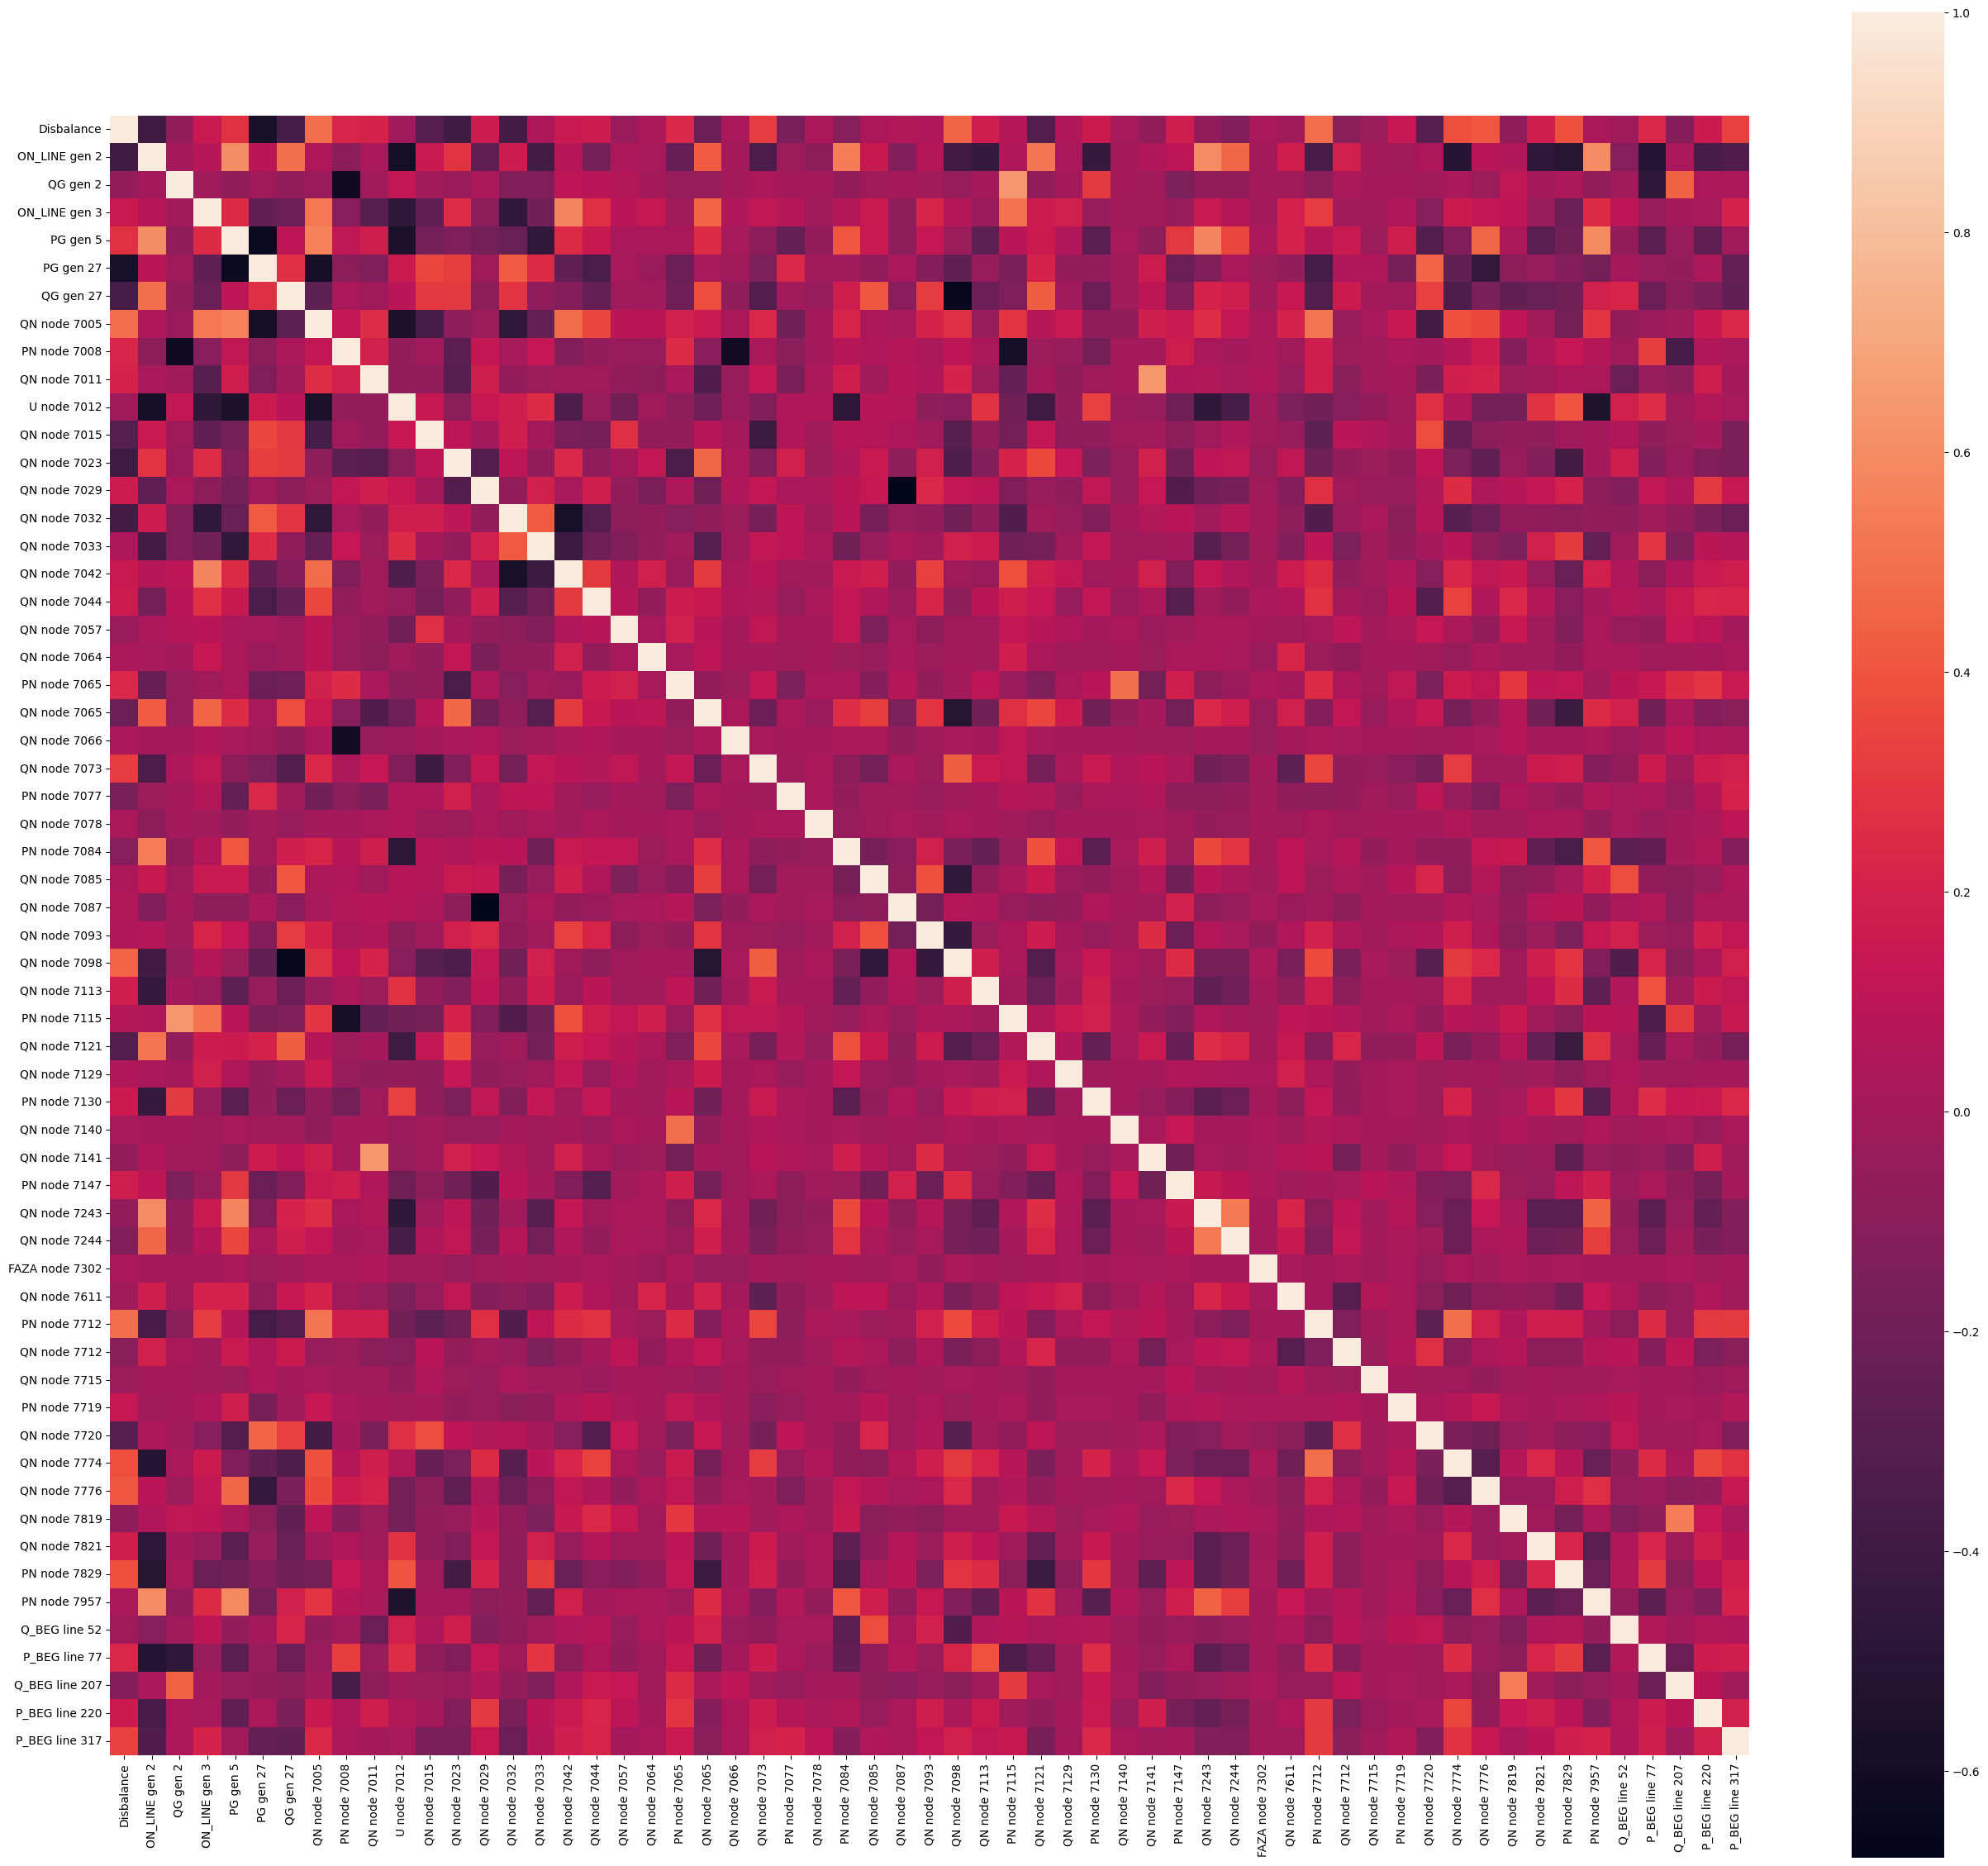

In [12]:
corrmat = df_corr.corr()
f, ax = plt.subplots(figsize=(32, 29))
sns.heatmap(corrmat, vmax=1, square=True);

### Check class disbalance

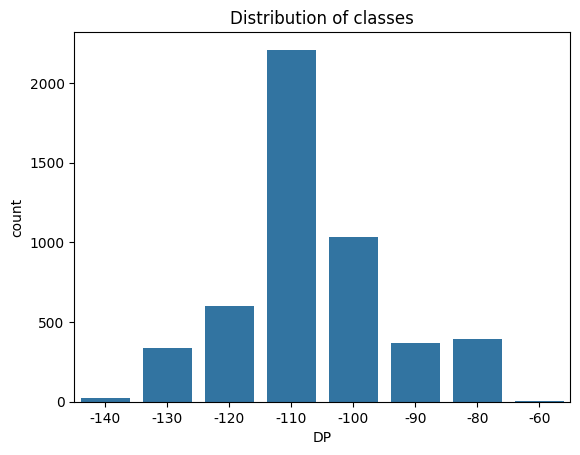

In [13]:
# Distribution of classes

sns.countplot(df, x='DP')
plt.title('Distribution of classes')

plt.show()

In [14]:
def check_class_disbalance(df, target):
    print(df[target].value_counts())
    print(df[target].value_counts(normalize=True))

check_class_disbalance(df, 'DP')

DP
-110    2208
-100    1032
-120     601
-80      391
-90      368
-130     337
-140      23
-60        2
Name: count, dtype: int64
DP
-110    0.444982
-100    0.207981
-120    0.121121
-80     0.078799
-90     0.074164
-130    0.067916
-140    0.004635
-60     0.000403
Name: proportion, dtype: float64


In [15]:
# drop rows
def drop_min_rows(df, *values):
    for value in values:
        df = df.drop(df[df['DP'] == value].index, axis=0)
    return df

df = pd.concat([df_corr, df_target], axis=1)
new_df = drop_min_rows(df, -60, -140)
new_df

,Disbalance,ON_LINE gen 2,QG gen 2,ON_LINE gen 3,PG gen 5,PG gen 27,QG gen 27,QN node 7005,PN node 7008,QN node 7011,...,QN node 7819,QN node 7821,PN node 7829,PN node 7957,Q_BEG line 52,P_BEG line 77,Q_BEG line 207,P_BEG line 220,P_BEG line 317,DP
5,143.14,0,0.0,0,0.00,0.0,0.00,0.660812,5.126475,0.484510,...,0.000000,0.180033,0.336362,0.000000,0.08,-0.06,0.00,0.00,0.81,-130
15,142.77,0,0.0,0,0.00,0.0,0.00,0.625786,5.078537,0.429343,...,0.000000,0.229031,0.326488,0.000000,0.09,-0.24,0.00,0.00,0.49,-130
16,142.60,0,0.0,0,0.00,0.0,0.00,0.703919,5.017258,0.473474,...,0.000000,0.227000,0.326575,0.000000,0.09,-0.21,0.00,0.00,0.00,-130
18,143.20,0,0.0,0,0.00,0.0,0.00,0.619212,5.051795,0.423491,...,0.000000,0.000000,0.325609,0.000000,0.08,-0.30,0.00,0.00,0.00,-130
19,142.49,0,0.0,0,0.00,0.0,0.00,0.685193,5.116674,0.466858,...,0.000000,0.000000,0.297376,0.000000,0.08,-0.26,0.00,0.00,0.00,-130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,87.00,1,0.0,0,57.84,0.0,0.49,0.622408,4.974919,0.396740,...,0.179387,0.000000,0.161586,0.154437,0.07,0.00,0.02,-0.40,0.01,-90
4992,86.36,1,0.0,0,57.81,0.0,0.49,0.597116,4.898256,0.385834,...,0.151526,0.000000,0.077829,0.153178,0.07,0.00,0.00,-0.42,0.01,-90
4993,87.25,1,0.0,0,57.81,0.0,0.49,0.597116,4.898256,0.385834,...,0.151526,0.000000,0.077829,0.153178,0.07,0.00,0.00,-0.42,0.01,-90
4994,86.29,1,0.0,0,57.94,0.0,0.49,0.569164,4.943099,0.392175,...,0.181917,0.000000,0.097480,0.138218,0.07,0.00,0.02,-0.12,0.00,-90


 ## make balance class distribution

In [16]:
# balance classes

def balance_classes(df):
    df_balanced = pd.DataFrame()
    min_class_count = df['DP'].value_counts().min()
    for label in df['DP'].unique():
        df_label = df[df['DP'] == label]
        if len(df_label) > min_class_count:
            df_random_sample = df_label.sample(min_class_count)
            df_balanced = pd.concat([df_balanced, df_random_sample])
        else:
            df_balanced = pd.concat([df_balanced, df_label])
    return df_balanced

new_df = balance_classes(new_df)
check_class_disbalance(new_df, 'DP')

DP
-130    337
-110    337
-120    337
-100    337
-90     337
-80     337
Name: count, dtype: int64
DP
-130    0.166667
-110    0.166667
-120    0.166667
-100    0.166667
-90     0.166667
-80     0.166667
Name: proportion, dtype: float64


In [17]:
df_check = new_df.copy()

df_check

,Disbalance,ON_LINE gen 2,QG gen 2,ON_LINE gen 3,PG gen 5,PG gen 27,QG gen 27,QN node 7005,PN node 7008,QN node 7011,...,QN node 7819,QN node 7821,PN node 7829,PN node 7957,Q_BEG line 52,P_BEG line 77,Q_BEG line 207,P_BEG line 220,P_BEG line 317,DP
5,143.14,0,0.0,0,0.00,0.00,0.00,0.660812,5.126475,0.484510,...,0.0,0.180033,0.336362,0.000000,0.08,-0.06,0.0,0.00,0.81,-130
15,142.77,0,0.0,0,0.00,0.00,0.00,0.625786,5.078537,0.429343,...,0.0,0.229031,0.326488,0.000000,0.09,-0.24,0.0,0.00,0.49,-130
16,142.60,0,0.0,0,0.00,0.00,0.00,0.703919,5.017258,0.473474,...,0.0,0.227000,0.326575,0.000000,0.09,-0.21,0.0,0.00,0.00,-130
18,143.20,0,0.0,0,0.00,0.00,0.00,0.619212,5.051795,0.423491,...,0.0,0.000000,0.325609,0.000000,0.08,-0.30,0.0,0.00,0.00,-130
19,142.49,0,0.0,0,0.00,0.00,0.00,0.685193,5.116674,0.466858,...,0.0,0.000000,0.297376,0.000000,0.08,-0.26,0.0,0.00,0.00,-130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,86.35,1,0.0,0,64.17,0.00,0.70,0.550887,4.825578,0.376154,...,0.0,0.000000,0.193500,0.137621,0.07,0.00,0.0,-0.65,0.00,-80
3757,85.57,1,0.0,0,64.14,0.00,1.00,0.233839,4.858116,0.357610,...,0.0,0.000000,0.186218,0.178889,0.07,0.00,0.0,-0.52,0.04,-80
4724,85.10,1,0.0,0,38.21,0.21,0.53,0.439733,4.996432,0.372477,...,0.0,0.000000,0.112083,0.160558,0.07,0.00,0.0,-0.30,0.02,-80
4731,85.32,1,0.0,0,38.50,0.20,0.54,0.452935,4.995254,0.360971,...,0.0,0.000000,0.092698,0.160492,0.07,0.00,0.0,-0.14,0.02,-80


In [18]:
# select best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, f_classif, chi2

kbest = SelectKBest(k=10, score_func=mutual_info_classif)
kbest.fit(df_check.drop('DP', axis=1), df_check['DP'])
rec = kbest.get_support()
print(rec)
list_best = []
for i, r in enumerate(rec):
    if r == True:
        list_best.append(df_check.columns[i])
        print(df_check.columns[i], kbest.scores_[i])
if 'DP' in list_best:
    list_best.remove('DP')
df_best = df_check[list_best]
df_best

[ True False False False  True False  True  True False False  True  True
 False False False False False False False False  True False False  True
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False  True False False False False False False False False False]
Disbalance 1.1682777051789526
PG gen 5 1.1053929304930945
QG gen 27 0.5959837712302667
QN node 7005 0.6764601559375372
U node 7012 0.6600737303544859
QN node 7015 0.566930692193107
PN node 7065 0.7658954699849274
QN node 7073 0.7473473876157786
QN node 7611 0.7190322076601441
QN node 7776 0.7730626014490152


,Disbalance,PG gen 5,QG gen 27,QN node 7005,U node 7012,QN node 7015,PN node 7065,QN node 7073,QN node 7611,QN node 7776
5,143.14,0.00,0.00,0.660812,119.229026,0.000000,4.448826,8.000000,0.000000,1.131414
15,142.77,0.00,0.00,0.625786,119.225691,0.000000,4.469421,8.000000,0.000000,1.121359
16,142.60,0.00,0.00,0.703919,119.228304,0.000000,4.363729,8.000000,0.000000,1.121407
18,143.20,0.00,0.00,0.619212,119.240238,0.000000,4.375185,8.000000,0.000000,1.101456
19,142.49,0.00,0.00,0.685193,119.237180,0.000000,4.330210,8.000000,0.000000,1.101435
...,...,...,...,...,...,...,...,...,...,...
3787,86.35,64.17,0.70,0.550887,118.869709,0.751418,2.620934,2.305673,1.295262,1.110968
3757,85.57,64.14,1.00,0.233839,118.873621,0.767484,2.744397,2.677542,1.301740,1.104465
4724,85.10,38.21,0.53,0.439733,118.670187,1.317989,3.194032,1.368719,1.513205,1.227851
4731,85.32,38.50,0.54,0.452935,118.658163,1.532481,3.152351,1.301400,1.390888,1.164628


In [41]:
# check that dataframe contain column

if df_best.Disbalance.empty == None:
    df_best =  pd.concat([df_check.Disbalance, df_best], axis=1)

df_best.head()

,Disbalance,Disbalance,PG gen 5,QG gen 27,QN node 7005,U node 7012,QN node 7015,PN node 7065,QN node 7073,QN node 7611,QN node 7776
5,143.14,143.14,0.0,0.0,0.660812,119.229026,0.0,4.448826,8.0,0.0,1.131414
15,142.77,142.77,0.0,0.0,0.625786,119.225691,0.0,4.469421,8.0,0.0,1.121359
16,142.60,142.60,0.0,0.0,0.703919,119.228304,0.0,4.363729,8.0,0.0,1.121407
18,143.20,143.20,0.0,0.0,0.619212,119.240238,0.0,4.375185,8.0,0.0,1.101456
19,142.49,142.49,0.0,0.0,0.685193,119.237180,0.0,4.330210,8.0,0.0,1.101435


In [20]:
# make pipeline

from sklearn.pipeline import Pipeline


pipeline = Pipeline([
    ('kbest', SelectKBest(k=58, score_func=mutual_info_classif)),
    ('clf', RandomForestClassifier())
])

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
pipeline.fit(df_check.drop('DP', axis=1), df_check['DP'])

Pipeline(steps=[('kbest',
                 SelectKBest(k=58,
                             score_func=<function mutual_info_classif at 0x79e964753ac0>)),
                ('clf', RandomForestClassifier())])

In [ ]:
pipeline.predict(df_check.drop('DP', axis=1))
pipeline.score(df_check.drop('DP', axis=1), df_check['DP'])

1.0

In [ ]:
df_best.shape

(4962, 10)

# catboost classifier

In [21]:
%pip install catboost



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [22]:
import catboost

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_best, df_check['DP'], test_size=0.33, random_state=42)
cbmodel = catboost.CatBoostClassifier()
cbmodel.fit(X_train, y_train)
cb_res = cbmodel.predict(X_test)
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, cb_res)

CatBoostError: /src/catboost/catboost/libs/data/features_layout.cpp:120: All feature names should be different, but 'Disbalance' used more than once.

# XGBoost

In [92]:
# XGBoost
from xgboost import XGBClassifier

In [93]:
def labels_to_numbers(y):
    class_dict = {}
    count = 0
    for i in y.unique():
        class_dict[i] = count
        count += 1
    return class_dict

    #return y.map(class_dict)
class_id = labels_to_numbers(df_target)

def change_classes(y, dict):
    return y.map(dict)

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_best, df_check.DP, test_size=0.33, random_state=42)
xgbmodel = XGBClassifier()
xgbmodel.fit(X_train, change_classes(y_train, class_id))
xgb_res = xgbmodel.predict(X_test)
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(change_classes(y_test, class_id), xgb_res)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5], got [1 3 4 5 6 7]

# RandomForest

In [95]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_best, df_check.DP, test_size=0.33, random_state=42)
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train, y_train)
rf_res = rfmodel.predict(X_test)
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, rf_res)

0.9251497005988024

In [96]:
print("CatBoost: ", accuracy_score(y_test, cb_res) , "\n",
      "XGBoost: ", accuracy_score(change_classes(y_test, class_id), xgb_res), "\n",
      "RandomForest: ", accuracy_score(y_test, rf_res) )

NameError: name 'xgb_res' is not defined

# Deep Learning

## TensorFlow

In [24]:
from tensorflow import keras
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

2024-03-27 20:59:01.560612: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-27 20:59:01.560909: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-27 20:59:01.609335: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-27 20:59:01.732124: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-27 20:59:02.465543: W tensorflow/compiler/tf2tensorrt/utils/py_uti

In [25]:
# make multiclass classification on tensorflow
# https://www.tensorflow.org/tutorials/keras/basic_classification



mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(type(x_train), type(y_train), type(x_test), type(y_test))
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(x_train)
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)

probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

probability_model(x_test[:5])




<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]


/home/art/prog/dip_proj/envml/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 493us/step - accuracy: 0.8540 - loss: 0.4942
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 475us/step - accuracy: 0.9546 - loss: 0.1559
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - accuracy: 0.9663 - loss: 0.1086
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.9731 - loss: 0.0864
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.9783 - loss: 0.0721
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.9702 - loss: 0.0940


<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0.08536746, 0.08536746, 0.08536871, 0.085576  , 0.08536743,
        0.08536752, 0.08536743, 0.23148295, 0.08536748, 0.08536754],
       [0.08534246, 0.08538153, 0.23187867, 0.08534247, 0.08534246,
        0.08534246, 0.08534246, 0.08534246, 0.08534246, 0.08534246],
       [0.08534525, 0.23183453, 0.08535397, 0.08534593, 0.08534654,
        0.08534537, 0.08534572, 0.08537906, 0.08535825, 0.08534528],
       [0.23195417, 0.0853377 , 0.08534287, 0.0853378 , 0.08533774,
        0.08533773, 0.08533861, 0.08533785, 0.08533769, 0.08533773],
       [0.08537623, 0.0853734 , 0.08537418, 0.08537354, 0.23138823,
        0.08537348, 0.08537392, 0.08538216, 0.08537346, 0.08561143]],
      dtype=float32)>

In [26]:
from sklearn import preprocessing


# normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_target = df_check['DP']
df_data_train = scaler.fit_transform(df_best)
df_data_train




array([[0.98674052, 0.98674052, 0.        , ..., 1.        , 0.        ,
        0.80642676],
       [0.98053038, 0.98053038, 0.        , ..., 1.        , 0.        ,
        0.79926   ],
       [0.97767707, 0.97767707, 0.        , ..., 1.        , 0.        ,
        0.79929433],
       ...,
       [0.01258812, 0.01258812, 0.54306424, ..., 0.17108992, 0.16813389,
        0.87516319],
       [0.01628063, 0.01628063, 0.5471859 , ..., 0.16267505, 0.15454316,
        0.83010002],
       [0.02903659, 0.02903659, 0.64141558, ..., 0.23474796, 1.        ,
        0.64591239]])

In [27]:
data_train = df_data_train
data_train_labels = df_check["DP"]
data_features = data_train.copy()
data_features = np.array(data_features)
data_features = df_data_train

In [28]:
data_train_labels = np.array(data_train_labels)
# to list 
print(type(data_train_labels), type(data_features))


<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [31]:
data_model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation ='relu'),
    tf.keras.layers.Dense(6),
])

data_model.compile(optimizer = "adam", loss = "mean_squared_error", metrics=["accuracy"])
data_model.fit(data_features, data_train_labels, epochs = 10)

# prediction

#data_model.evaluate(data_features, data_train_labels)
 
 

Epoch 1/10


2024-03-27 21:04:32.461523: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Incompatible shapes: [32] vs. [32,6]
	 [[{{function_node __inference_one_step_on_data_24890}}{{node gradient_tape/compile_loss/mean_squared_error/sub/BroadcastGradientArgs}}]]


InvalidArgumentError: Graph execution error:

Detected at node gradient_tape/compile_loss/mean_squared_error/sub/BroadcastGradientArgs defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/art/prog/dip_proj/envml/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/art/prog/dip_proj/envml/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/art/prog/dip_proj/envml/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/art/prog/dip_proj/envml/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/run/current-system/sw/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/run/current-system/sw/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/run/current-system/sw/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/home/art/prog/dip_proj/envml/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 542, in dispatch_queue

  File "/home/art/prog/dip_proj/envml/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 531, in process_one

  File "/home/art/prog/dip_proj/envml/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/art/prog/dip_proj/envml/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 359, in execute_request

  File "/home/art/prog/dip_proj/envml/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 775, in execute_request

  File "/home/art/prog/dip_proj/envml/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 446, in do_execute

  File "/home/art/prog/dip_proj/envml/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/art/prog/dip_proj/envml/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3051, in run_cell

  File "/home/art/prog/dip_proj/envml/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3106, in _run_cell

  File "/home/art/prog/dip_proj/envml/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/art/prog/dip_proj/envml/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3311, in run_cell_async

  File "/home/art/prog/dip_proj/envml/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3493, in run_ast_nodes

  File "/home/art/prog/dip_proj/envml/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "/tmp/ipykernel_17788/79421629.py", line 7, in <module>

  File "/home/art/prog/dip_proj/envml/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 118, in error_handler

  File "/home/art/prog/dip_proj/envml/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 323, in fit

  File "/home/art/prog/dip_proj/envml/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 117, in one_step_on_iterator

  File "/home/art/prog/dip_proj/envml/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 105, in one_step_on_data

  File "/home/art/prog/dip_proj/envml/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 69, in train_step

Incompatible shapes: [32] vs. [32,6]
	 [[{{node gradient_tape/compile_loss/mean_squared_error/sub/BroadcastGradientArgs}}]] [Op:__inference_one_step_on_iterator_24931]

## PyTorch

In [ ]:
from torch import pytorch